<a href="https://colab.research.google.com/github/upadhyaypuja/upadhyaypuja/blob/main/Play_Store_App_Review_Analysis_PujaBharti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
# Explore and analyze the data to discover key factors responsible for app engagement and success.

# Here we are going to analyze the data of play store apps,we are havng two dataset i,e play store apps dataset and user reviews dataset.we are going to use some libraries of python to analyze our dataset.

In [1]:
#importing some important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool


# Let's mount our google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path1="/content/drive/MyDrive/Play Store App Review Analysis/Play Store Data.csv"

In [4]:
file_path2="/content/drive/MyDrive/Play Store App Review Analysis/User Reviews.csv"

In [5]:
#creating dataframe
plstr_df=pd.read_csv(file_path1)
usr_df=pd.read_csv(file_path2)

# *Let's analyse the data of Play Store App review *

In [6]:
#Get the shape of data in rows and columns
plstr_df.shape

(10841, 13)

In [7]:
#print first five rows of play store apps data
plstr_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
#print the last five rows of play store apps data
plstr_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [9]:
#print all the information of Play Store apps data
plstr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
#print all the descriptive values of data
plstr_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [11]:
#print all the columns in our data
plstr_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Data Cleaning of plstr_df

In [12]:
plstr_df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

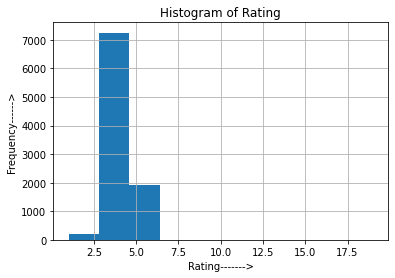

In [13]:
plstr_df.hist('Rating');
plt.xlabel('Rating------->')
plt.ylabel('Frequency------>')
plt.title('Histogram of Rating');

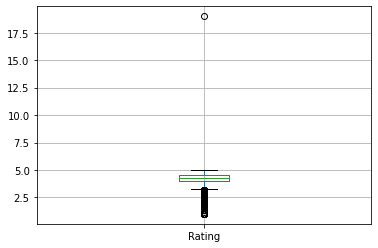

In [14]:
plstr_df.boxplot('Rating');

In [15]:
#checking outliers
plstr_df[plstr_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
#fixing mixmatched values
plstr_df.loc[10472] = plstr_df.loc[10472].shift()
plstr_df['App'].loc[10472] = plstr_df['Category'].loc[10472]
plstr_df['Category'].loc[10472] = np.nan
plstr_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [17]:
#checking the null values
plstr_df.isnull().sum()
plstr_df.dropna(inplace=True)

In [18]:
plstr_df.drop_duplicates(inplace=True)
plstr_df.shape

(8886, 13)

In [19]:
plstr_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [20]:
plstr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             8886 non-null   object
 1   Category        8886 non-null   object
 2   Rating          8886 non-null   object
 3   Reviews         8886 non-null   object
 4   Size            8886 non-null   object
 5   Installs        8886 non-null   object
 6   Type            8886 non-null   object
 7   Price           8886 non-null   object
 8   Content Rating  8886 non-null   object
 9   Genres          8886 non-null   object
 10  Last Updated    8886 non-null   object
 11  Current Ver     8886 non-null   object
 12  Android Ver     8886 non-null   object
dtypes: object(13)
memory usage: 971.9+ KB


In [ ]:
#Here we can see  Reviews, Size, Installs, & price  have object datatype, But it should be int or float datatype, 
#So let’s convert them to their respective correct type. 